In [34]:
import os
import subprocess
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
from astropy.io import ascii

import pandas as pd
import pandasql as ps


In [2]:
os.chdir('./qualityOutput/')

In [3]:
dirlist = os.listdir('.')
dirlist = [x for x in dirlist if '_results.py' in x]

In [4]:
for x in dirlist:
    loc = x.find('_')
    name = x[:loc]
    newName = 'output'+name+'.py'
    subprocess.call(['mv',x,newName])
    print('import '+newName[:-3])

In [5]:
import output29018
import output79951
import output79953
import output29010
import output79949
import output29007
import output79945
import output29005
import output29015
import output29020
import output29012
import output29021
import output79952
import output79943
import output79944
import output79950
import output29017
import output29022
import output79946
import output79942
import output79947
import output79948
import output79941
import output29013
import output29011
import output29014
import output79940
import output29016
import output29009
import output29019

In [6]:
def makeQuality(Nrecovered,Ntarget,Ntot,weight=0.2):
    Nmax = max(Ntot)
    completeNess = [float(x)/float(y) if y != 0 else 0 for x,y in zip(Nrecovered,Ntarget)]
    completeNess = [x if x < 1. else 1. for x in completeNess]
    #accuracy = [1. - (float(x)/float(Nmax)) for x in Ntot]
    accuracy = [float(x)/float(y) if y !=0 else 0 for x,y in zip(Nrecovered,Ntot)]
    accuracyNormaliser = 1./ max(accuracy)
    accuracy = [x*accuracyNormaliser for x in accuracy]
    #quality = (completeNess*weight) + ((1-weight)*accuracy)
    quality = [(float(c)*weight) + ((1.-weight)*float(a)) for c,a in zip(completeNess,accuracy)]
    return [quality,accuracy,completeNess]

In [7]:
def makeDS9RegFile(sexTabList,fileNameBase,tabType,colour='red',radius='10'):
    for tables in range(len(sexTabList)):
        if tabType == 'dao':
            xcoords = sexTabList[tables]['xcentroid']
            ycoords = sexTabList[tables]['ycentroid']
        elif tabType == 'sexMedian':
            ra = sexTabList[tables]['RA']
            dec = sexTabList[tables]['DEC']
        elif tabType == 'sex':
            xcoords = sexTabList[tables]['X_IMAGE']
            ycoords = sexTabList[tables]['Y_IMAGE']
        elif tabType == 'iraf':
            xcoords = sexTabList[tables]['X_POS']
            ycoords = sexTabList[tables]['Y_POS']        
        else:
            print('tab type error')
            break
        bigString = 'image\n'
        for x in range(len(xcoords)):
            bigString += 'circle({},{},'.format(xcoords[x],ycoords[x])+radius+') # color={}\n'.format(colour)
        fileName = fileNameBase + '.reg'
        with open(fileName,'w') as f:
            f.write(bigString)
            
    return fileName

In [8]:
def makeDS9RegFilewithLabels(sexTabList,fileNameBase,tabType,colour='red',radius='10'):
    for tables in range(len(sexTabList)):
        if tabType == 'dao':
            xcoords = sexTabList[tables]['xcentroid']
            ycoords = sexTabList[tables]['ycentroid']
        elif tabType == 'sexMedian':
            ra = sexTabList[tables]['RA']
            dec = sexTabList[tables]['DEC']
        elif tabType == 'sex':
            xcoords = sexTabList[tables]['X_IMAGE']
            ycoords = sexTabList[tables]['Y_IMAGE']
        elif tabType == 'iraf':
            xcoords = sexTabList[tables]['X_POS']
            ycoords = sexTabList[tables]['Y_POS']        
        else:
            print('tab type error')
            break
        bigString = 'image\n'
        for x in range(len(xcoords)):
            bigString += 'circle({},{},'.format(xcoords[x],ycoords[x])+radius+') # text={{'+str(x)+'}} color={}\n'.format(colour)
        fileName = fileNameBase + '.reg'
        with open(fileName,'w') as f:
            f.write(bigString)
            
    return fileName

In [9]:
def showOriginalAndDiscovered(imageNumber,settings):
    imageName = '/home/mj1e16/moleGazer/Photos/F/fitsImages/'+imageNumber+'InvertedAverage.fits'
    catName = '/home/mj1e16/moleGazer/Photos/F/fitsImages/simMolePos/{0}InvertedAverageCropped16{1}_{2}_{3}.cat'.format(imageNumber,settings[0],settings[1],settings[2])
    originalRegions = '/home/mj1e16/moleGazer/Photos/F/fitsImages/'+imageNumber+'.reg'
    catTab = ascii.read(catName)
    discoveredRegions = makeDS9RegFilewithLabels([catTab],'/home/mj1e16/moleGazer/Photos/F/fitsImages/tempRegions','sex')
    command = ['ds9',imageName,'-regions',originalRegions,'-regions',discoveredRegions]
    subprocess.call(command)

In [10]:
imageNumbers = [29005, 29007, 29009, 29010, 29011, 29012, 29013, 29014, 29015, 29016,
                29017, 29018, 29019, 29020, 29021, 29022,79940, 79941, 79942, 79943, 79944, 79945,
                79946, 79947, 79948, 79949, 79950, 79951, 79952]

In [11]:
bigDict = {'rightSideClose1':output29005,'backClose1':output29007,'front1':output29009,'back1':output29010,
           'rightSide1':output29011,'leftSide1':output29012,'leftShoulder1':output29013,
           'rightShoulder1':output29014,'leftArm1':output29015,'rightArm1':output29016,'rightArmTop1':output29017,
          'leftArm1':output29018,'legsBack1':output29019,'legsFront1':output29020,'legsSideLeft1':output29021,
          'legSideRight1':output29022,'front2':output79940,'back2':output79941,'rightShoulder2':output79942,
          'rightSide2':output79943,'leftShoulder2':output79944,'leftSide2':output79945,'leftArm2':output79946,
          'rightArm2':output79947,'rightArmTop2':output79948,'leftArmTop2':output79949,'legsFront2':output79950,
          'legsBack2':output79951,'legsSideRight2':output79952,'legsSideLeft2':output79953}

In [12]:
labels = ['rightSideClose1','backClose1','front1','back1',
           'rightSide1','leftSide1','leftShoulder1',
           'rightShoulder1','leftArm1','rightArm1','rightArmTop1',
          'leftArm1','legsBack1','legsFront1','legsSideLeft1',
          'legSideRight1','front2','back2','rightShoulder2',
          'rightSide2','leftShoulder2','leftSide2','leftArm2',
          'rightArm2','rightArmTop2','leftArmTop2','legsFront2',
          'legsBack2','legsSideRight2','legsSideLeft2']

In [13]:
maxVals = []
for key,value in bigDict.items():
    maxVals.append(max(value.Ntot))
#print(max(maxVals))
Nmax = max(maxVals)

In [14]:
qualityDict = {}
accuracyDict = {}
completenessDict = {}
settingsDict = {}
for key,value in bigDict.items():
    #print(key)
    qualities = makeQuality(value.Nrecovered,value.Ntarget,value.Ntot,weight=0.5)
    qualityDict[key] = qualities[0]
    accuracyDict[key] = qualities[1]
    completenessDict[key] = qualities[2]
    settingsDict[key] = value.settings

In [15]:
x = 0 
for key,value in qualityDict.items():
    if x == 0:
        averageQuality = value
        averageAccuracy = accuracyDict[key]
        averageCompleteness = completenessDict[key]
        
    else:
        averageQuality = [z+y for z,y in zip(averageQuality,value)]
        averageAccuracy = [z+y for z,y in zip(averageAccuracy,accuracyDict[key])]
        averageCompleteness = [z+y for z,y in zip(averageCompleteness,completenessDict[key])]

    x += 1
averageQuality = [z/x for z in averageQuality]
averageCompleteness = [z/x for z in averageCompleteness]
averageAccuracy = [z/x for z in averageAccuracy]

In [16]:
maxQuality = max(averageQuality)
qualityLoc = averageQuality.index(maxQuality)
maxSettings = output29005.settings[qualityLoc]
completnessAtMax = averageCompleteness[qualityLoc] 
accuracyAtmax = averageAccuracy[qualityLoc]
print(maxSettings,maxQuality,qualityLoc,completnessAtMax,accuracyAtmax)

([6.444444444444445, 21.842105263157894, 'gauss_5.0_9x9.conv'], 0.6489660136938592, 512, 0.6438974597701116, 0.6540345676176074)


In [17]:
output29005.Ntot[533]

145

In [18]:
# check these results and make some grapharinos

In [19]:
maxSettings


[6.444444444444445, 21.842105263157894, 'gauss_5.0_9x9.conv']

In [20]:
qualityFinal = []
accuracyFinal = []
completenessFinal = []
settingsFinal = []

qualityBest = []
accuracyBest = []
completenessBest = []
settingsBest = []

for key,value in qualityDict.items():
    qualityFinal.append(value[qualityLoc])
    accuracyFinal.append(accuracyDict[key][qualityLoc])
    completenessFinal.append(completenessDict[key][qualityLoc])
    settingsFinal.append(settingsDict[key][qualityLoc])
    
    highestQ = max(value)
    highestQLoc = value.index(highestQ)
    
    qualityBest.append(highestQ)
    accuracyBest.append(accuracyDict[key][highestQLoc])
    completenessBest.append(completenessDict[key][highestQLoc])
    settingsBest.append(settingsDict[key][highestQLoc])

In [21]:
showOriginalAndDiscovered(str(imageNumbers[2]),settingsBest[2])

In [22]:
showOriginalAndDiscovered(str(imageNumbers[8]),settingsFinal[8])

In [23]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

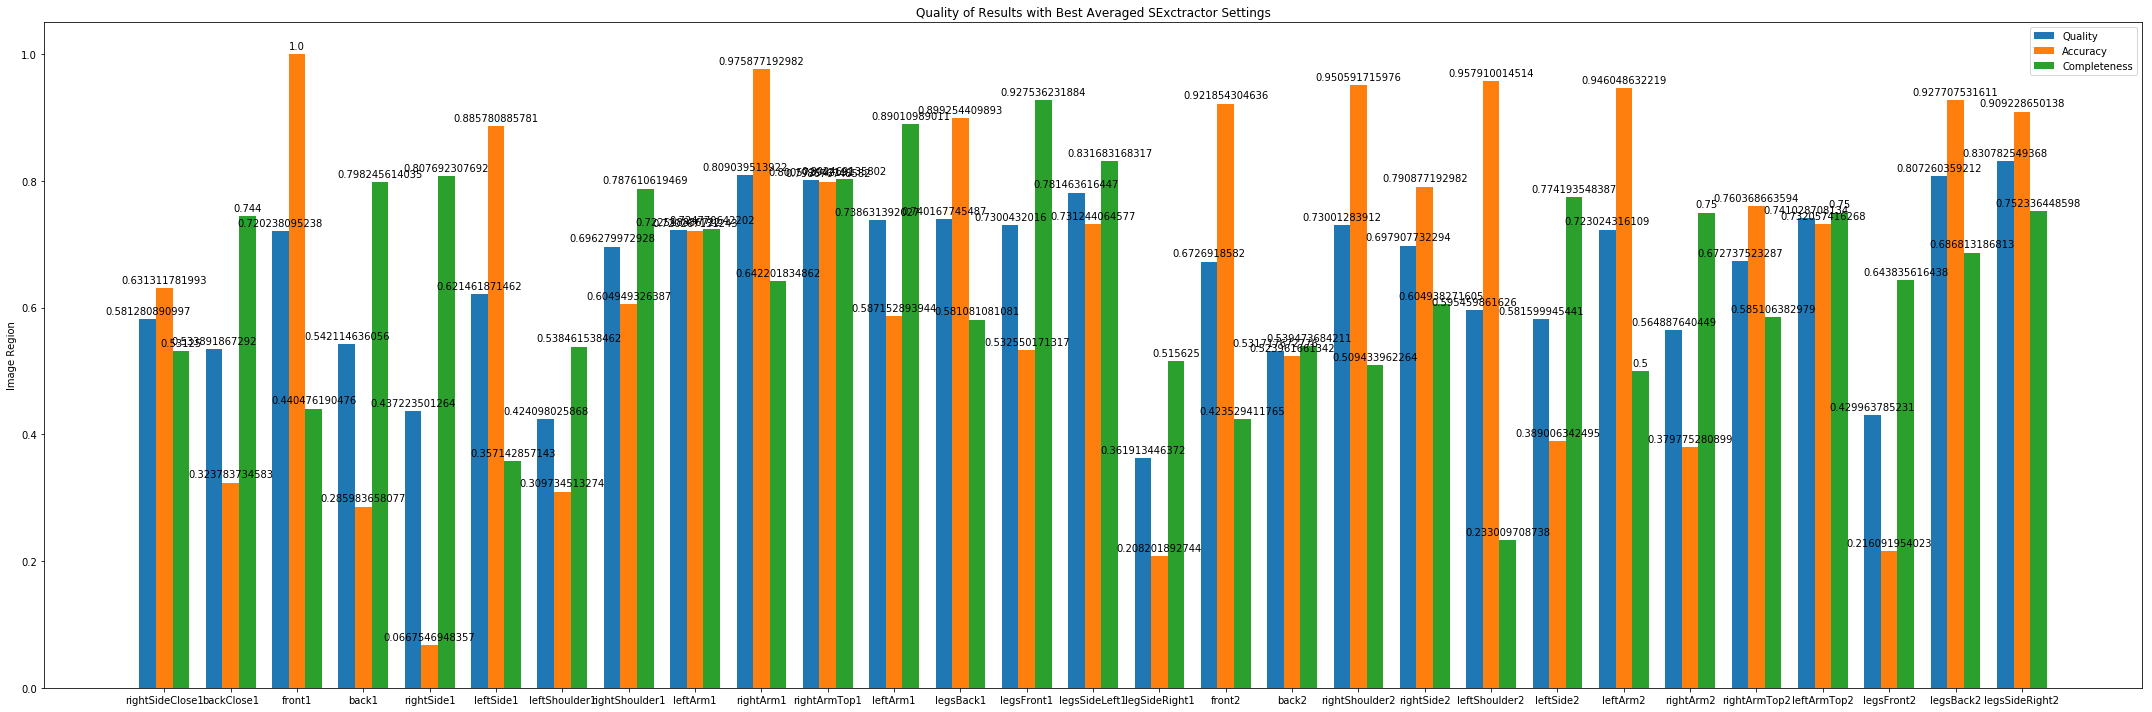

In [24]:
fig,ax = plt.subplots(figsize=(30,10))

x = np.arange(len(qualityFinal)) 
width = 0.25

rects1 = ax.bar(x-width,qualityFinal,width,label='Quality')
rects2 = ax.bar(x,accuracyFinal,width,label='Accuracy')
rects3 = ax.bar(x+width,completenessFinal,width,label='Completeness')

ax.set_ylabel('Image Region')
ax.set_title('Quality of Results with Best Averaged SExctractor Settings')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

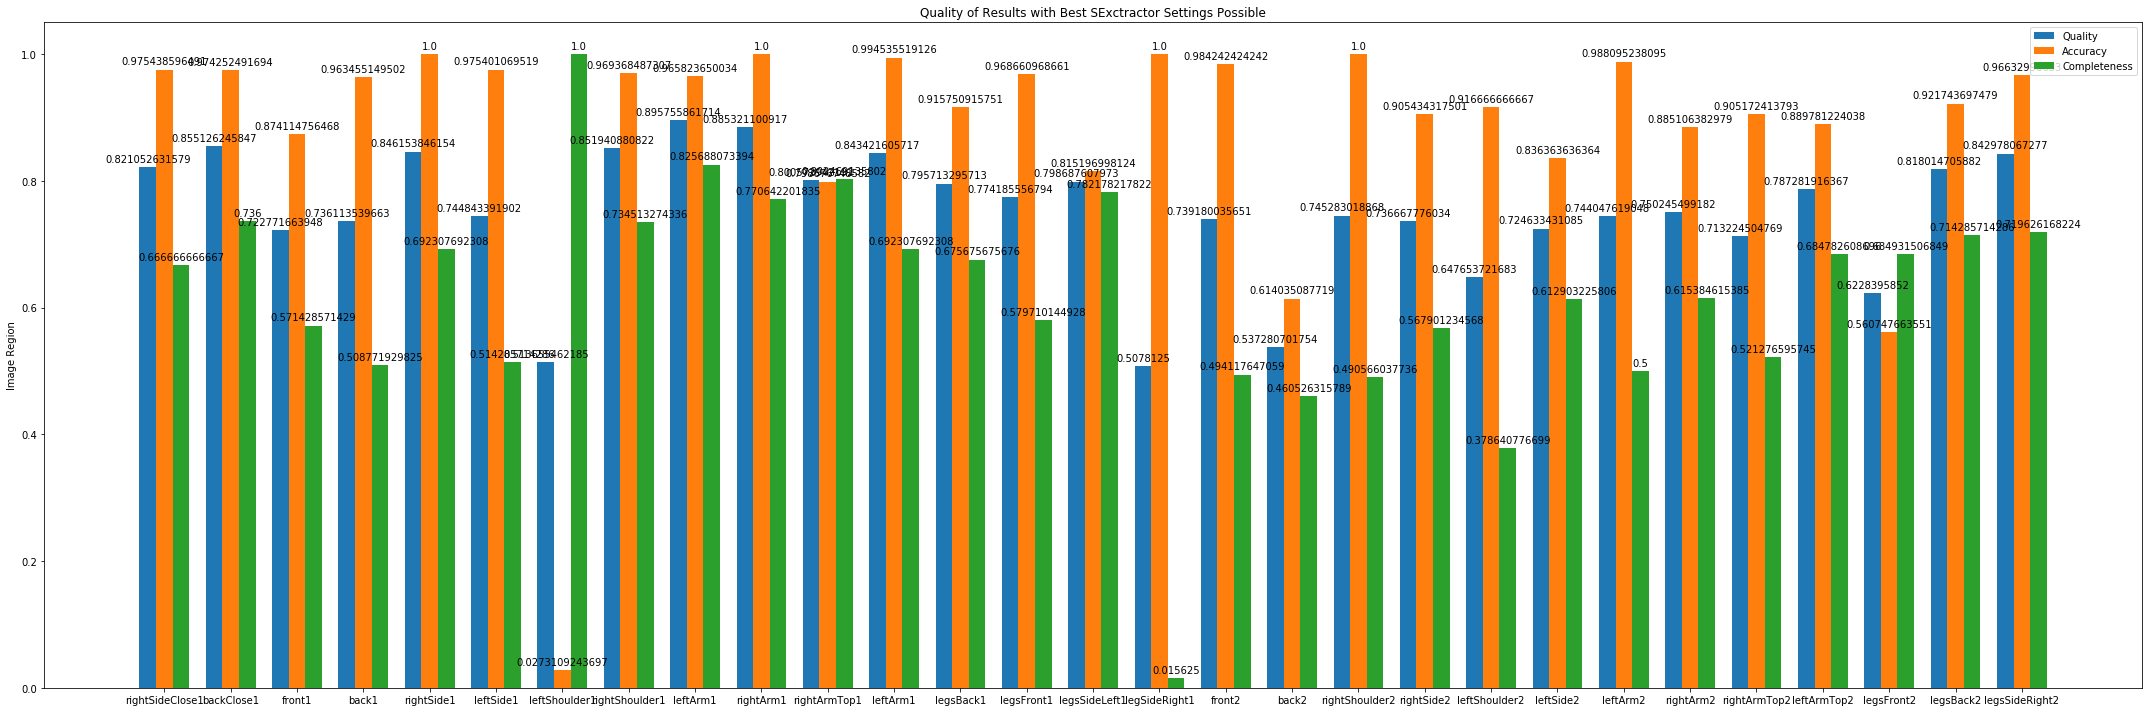

In [25]:
fig,ax = plt.subplots(figsize=(30,10))

x = np.arange(len(qualityFinal)) 
width = 0.25

rects1 = ax.bar(x-width,qualityBest,width,label='Quality')
rects2 = ax.bar(x,accuracyBest,width,label='Accuracy')
rects3 = ax.bar(x+width,completenessBest,width,label='Completeness')

ax.set_ylabel('Image Region')
ax.set_title('Quality of Results with Best SExctractor Settings Possible')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

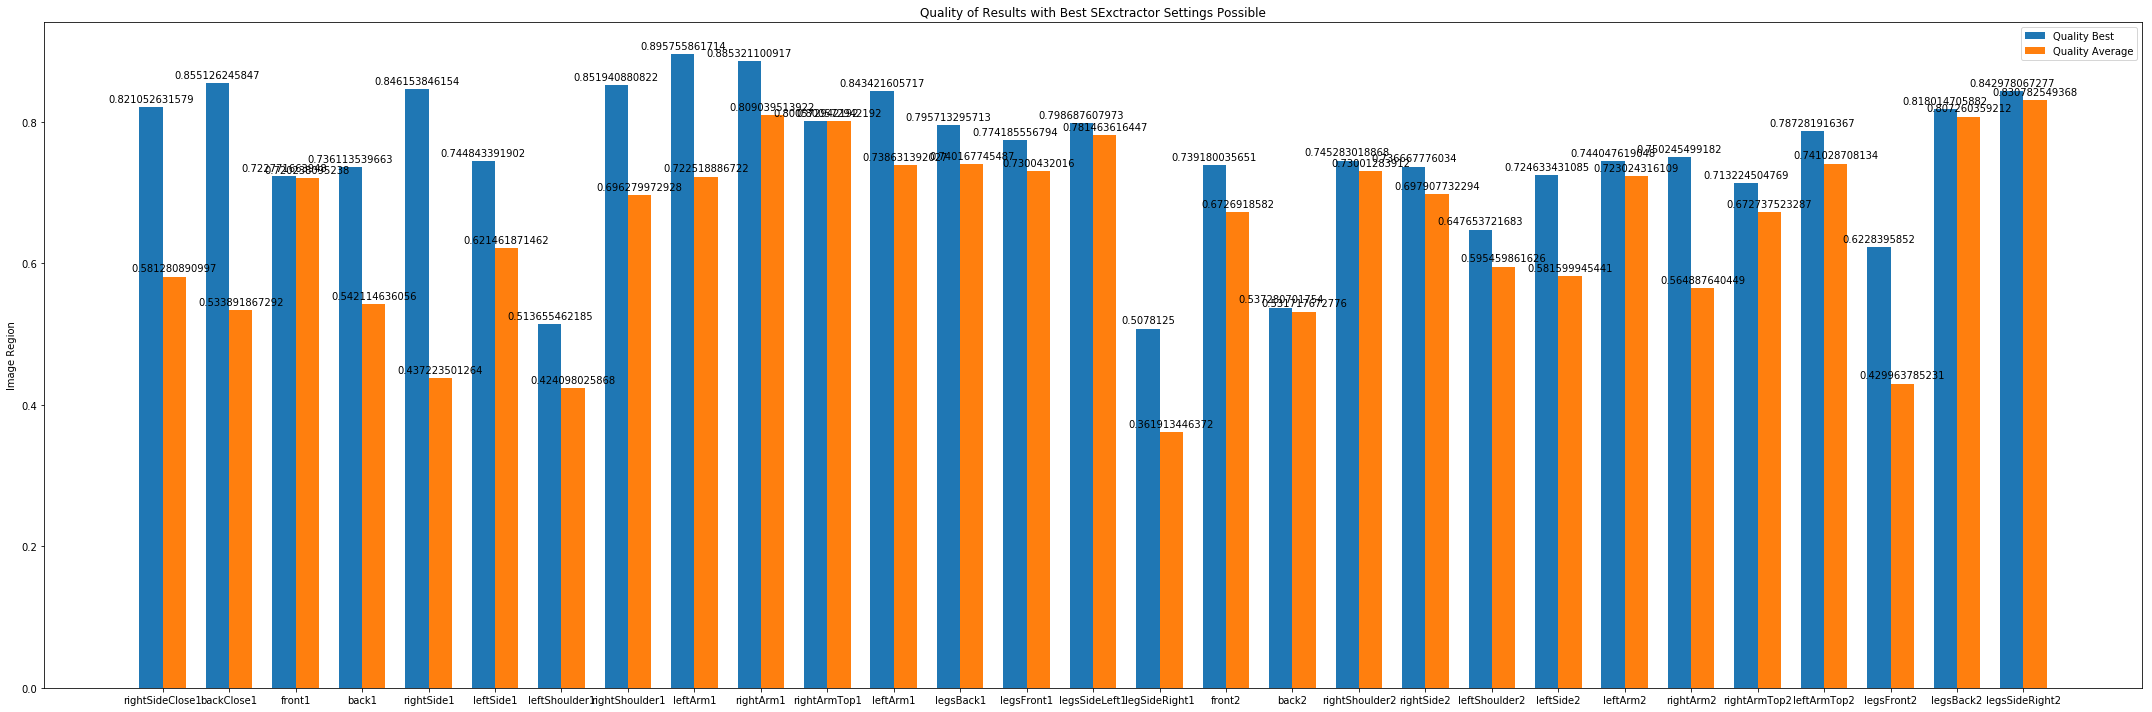

In [26]:
fig,ax = plt.subplots(figsize=(30,10))

x = np.arange(len(qualityFinal)) 
width = 0.35

rects1 = ax.bar(x-width/2,qualityBest,width,label='Quality Best')
rects2 = ax.bar(x+width/2,qualityFinal,width,label='Quality Average')

ax.set_ylabel('Image Region')
ax.set_title('Quality of Results with Best SExctractor Settings Possible')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)
#autolabel(rects3)

fig.tight_layout()

plt.show()

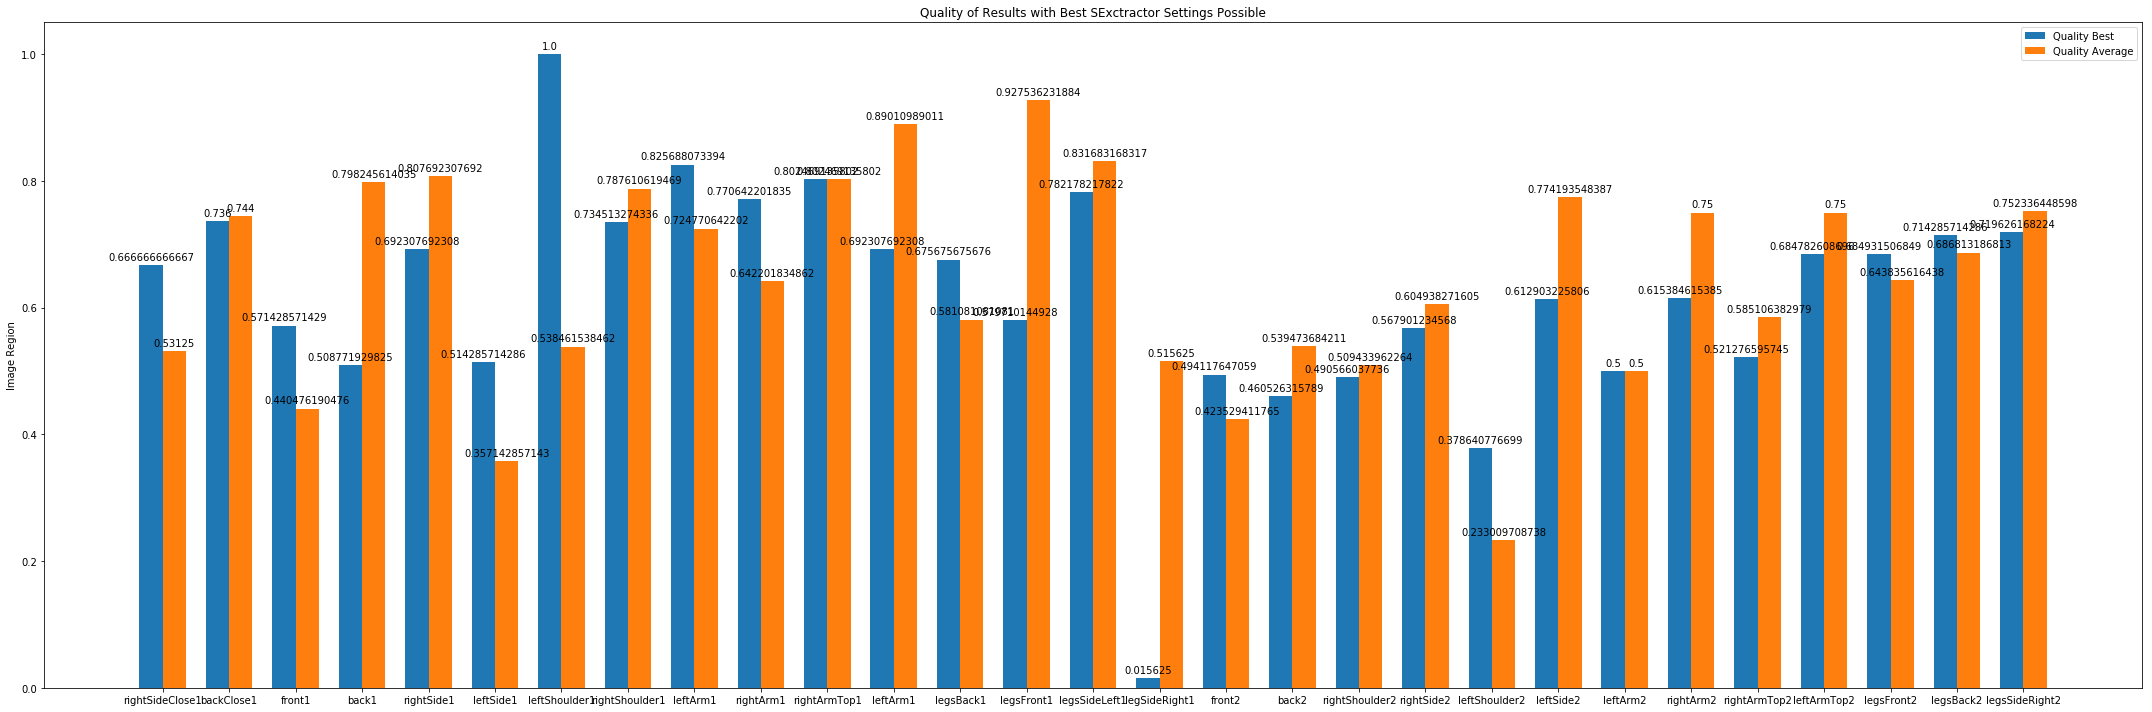

In [27]:
fig,ax = plt.subplots(figsize=(30,10))

x = np.arange(len(qualityFinal)) 
width = 0.35

rects1 = ax.bar(x-width/2,completenessBest,width,label='Quality Best')
rects2 = ax.bar(x+width/2,completenessFinal,width,label='Quality Average')

ax.set_ylabel('Image Region')
ax.set_title('Quality of Results with Best SExctractor Settings Possible')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)
#autolabel(rects3)

fig.tight_layout()

plt.show()

In [28]:
print('Completenss')
print(np.mean(completenessFinal))
print(np.mean(completenessBest))

print('\nQuality')
print(np.mean(qualityFinal))
print(np.mean(qualityBest))

print('\nAccuracy')
print(np.mean(accuracyFinal))
print(np.mean(accuracyBest))

Completenss
0.64389745977
0.621145256464

Quality
0.648966013694
0.751808921239

Accuracy
0.654034567618
0.882472586013


In [30]:
def assessQuality(output,sqlQuery,refPandasNew):
    pandasTable = Table.to_pandas(output)
    newdf = ps.sqldf(sqlQuery,locals())
#     Nrecovered = len(newdf)
#     Ntarget = len(refPandasNew)
#     Ntot = len(pandasTable)
    return newdf

In [31]:
def molePositions2Tab(molePositions):
    with open(molePositions,'r') as f:
        data = f.readlines()

    ycoord = []
    xcoord = []
    starLocations = []
    for x in data:
        if 'circle(' in x:
            locator1 = '('
            locator2 = ','
            loc1 = x.index(locator1) +1
            #print(x)
            loc2 = x[loc1:].index(locator2) + loc1 +1
            loc3 = x[loc2:].index(locator2) + loc2
            xcoord.append(x[loc1:loc2-1])
            ycoord.append(x[loc2:loc3])
            #starLocations.append([float(xcoord),float(ycoord)])
    tollerance = 5

    xUpper = [float(x) + tollerance for x in xcoord]
    xLower = [float(x) - tollerance for x in xcoord]
    yUpper = [float(x) + tollerance for x in ycoord]
    yLower = [float(x) - tollerance for x in ycoord]

    refDict = {'index':range(len(xcoord)),'xcoord':xcoord,'ycoord':ycoord,'xUpper':xUpper,'xLower':xLower,
              'yUpper':yUpper,'yLower':yLower}
    refPandasNew = pd.DataFrame(data=refDict)
    return refPandasNew

In [32]:
sqlcode = '''
SELECT *
FROM pandasTable
JOIN refPandasNew
ON pandasTable.X_IMAGE < refPandasNew.xUpper
AND pandasTable.X_IMAGE > refPandasNew.xLower
AND pandasTable.Y_IMAGE < refPandasNew.yUpper
AND pandasTable.Y_IMAGE > refPandasNew.yLower
'''

In [92]:
valList = [np.linspace(1,50,10),np.linspace(1,100,20),['default.conv','gauss_1.5_3x3.conv','gauss_2.0_3x3.conv','gauss_2.0_5x5.conv',
                                                    'gauss_2.5_5x5.conv','gauss_3.0_5x5.conv','gauss_3.0_7x7.conv',
                                                    'gauss_4.0_7x7.conv','gauss_5.0_9x9.conv','mexhat_1.5_5x5.conv',
                                                    'mexhat_2.0_7x7.conv','mexhat_2.5_7x7.conv','mexhat_3.0_9x9.conv',
                                                    'mexhat_4.0_9x9.conv','mexhat_5.0_11x11.conv','tophat_1.5_3x3.conv',
                                                    'tophat_2.0_3x3.conv','tophat_2.5_3x3.conv','tophat_3.0_3x3.conv',
                                                    'tophat_4.0_5x5.conv','tophat_5.0_5x5.conv']]

In [76]:
outputDirectory = '/home/mj1e16/moleGazer/Photos/F/fitsImages/simMolePos/'
inputDirectory = '/home/mj1e16/moleGazer/Photos/F/fitsImages/'

detections = [0 for x in range(len(inputDirectory))]
magnitude = [0 for x in range(len(inputDirectory))]
ellipticity = [0 for x in range(len(inputDirectory))]
elongation = [0 for x in range(len(inputDirectory))]


for imNum in range(len(imageNumbers)):
    inputTableName = inputDirectory+imageNumbers[imNum]+'.reg'
    inputDataFrame = molePositions2Tab(inputTableName)
    for x in range(len(valList[0])):
        for y in range(len(valList[1])):
            for z in range(len(valList[2])):
                outputTableName = outputDirectory+str(imageNumbers[imNum])+'InvertedAverageCropped16{}_{}_{}.cat'.format(str(valList[0][x]),str(valList[1][y]),str(valList[2][z]))
                outputDataFrame = ascii.read(outputTableName)
                matchedDataFrame = assessQuality(outputDataFrame,sqlcode,inputDataFrame)
                detectionPerIm = matchedDataFrame['index'].tolist()
                magPerIm = matchedDataFrame['MAG_BEST'].tolist()
                ellipPerIm = matchedDataFrame['ELLIPTICITY'].tolist()
                elongPerIm = matchedDataFrame['ELONGATION'].tolist()
                for i,detect in enumerate(detectionPerIm):
                    detections[detect] += 1
                    magnitude[detect] += magPerIm[i]
                    ellipticity[detect] +=  ellipPerIm[i]
                    elongation[detect] += elongation[i]

magAverage = [x/y if y!=0 else 0 for x,y in zip(magnitude,detections)]
ellipAverage = [x/y if y!=0 else 0 for x,y in zip(ellipticity,detections)]
elongAverage = [x/y if y!=0 else 0 for x,y in zip(elongation,detections)]

    # match tables and try to keep the removed rows as zeroed rows
    # average all tables and find % time each mole was recovered

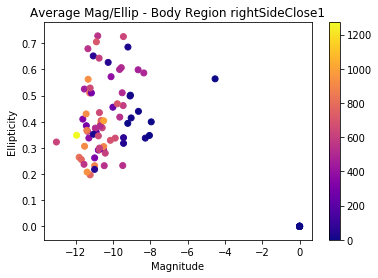

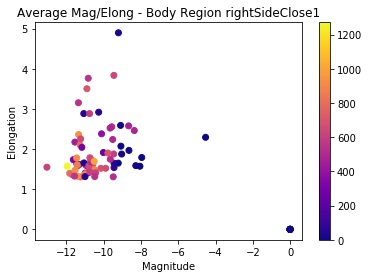

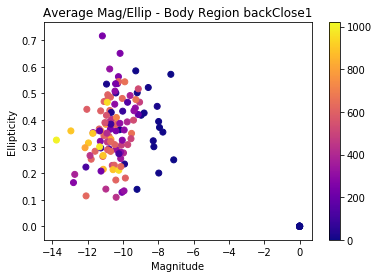

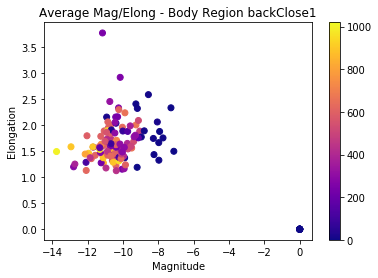

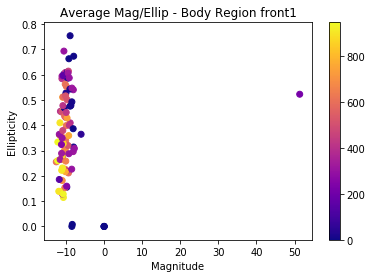

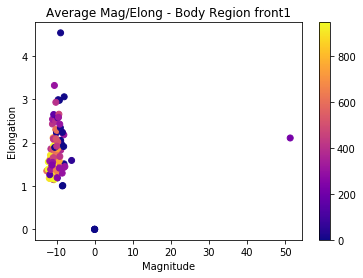

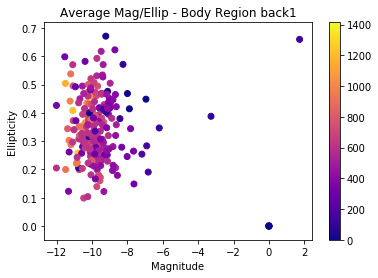

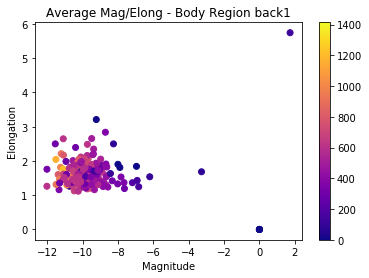

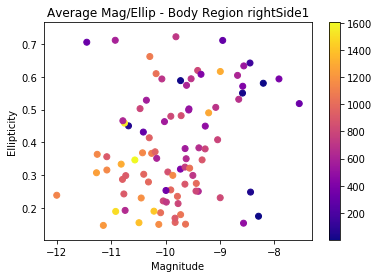

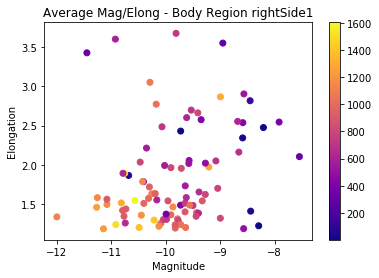

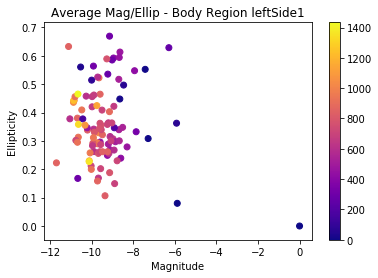

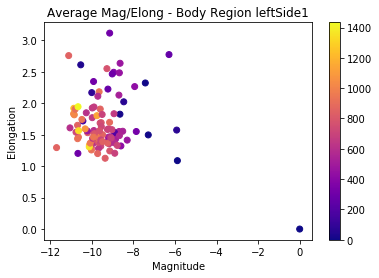

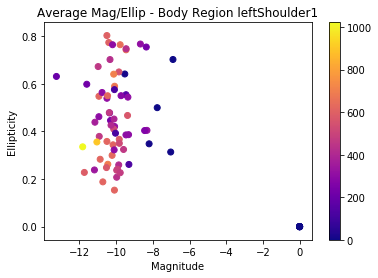

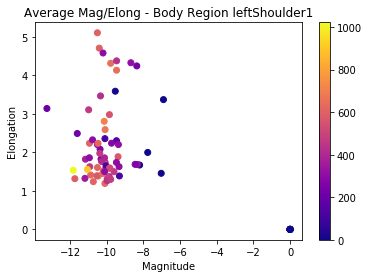

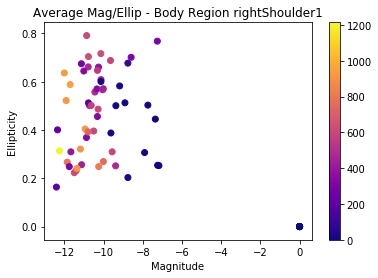

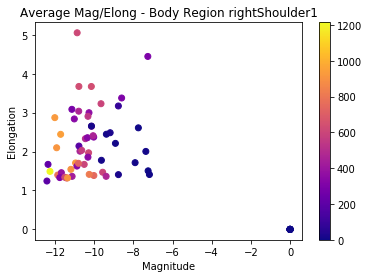

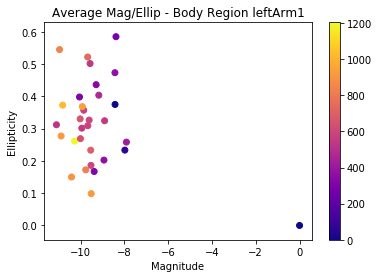

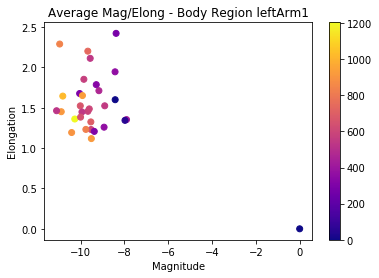

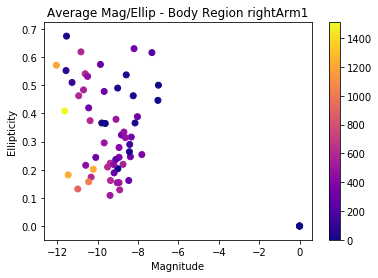

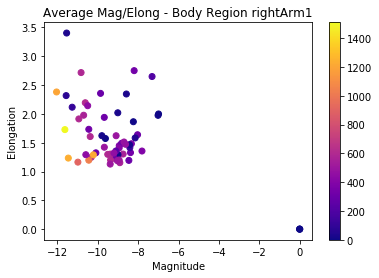

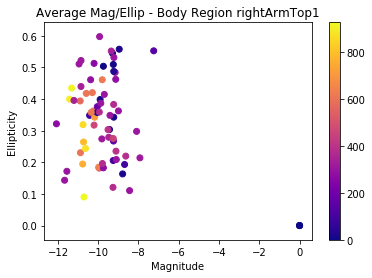

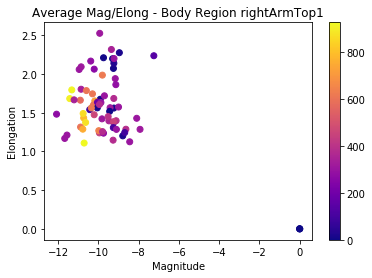

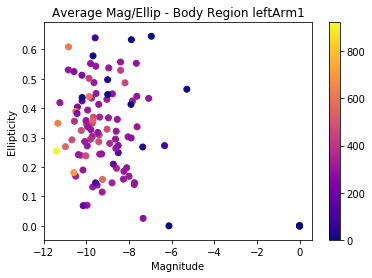

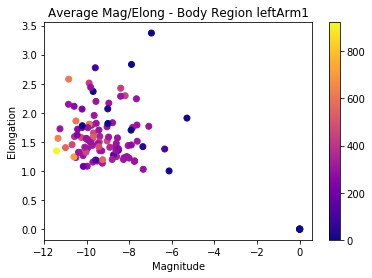

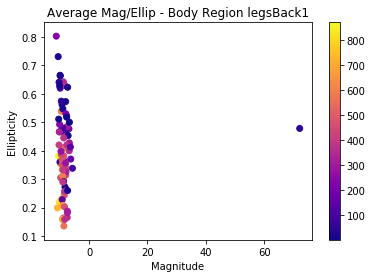

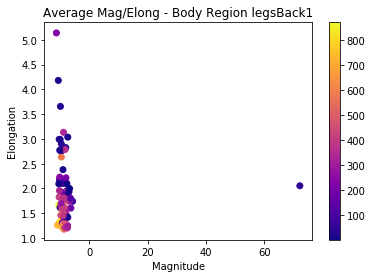

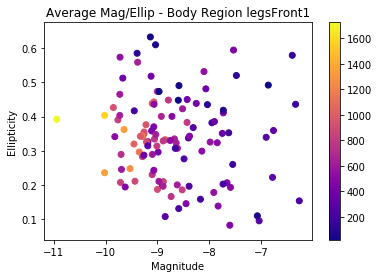

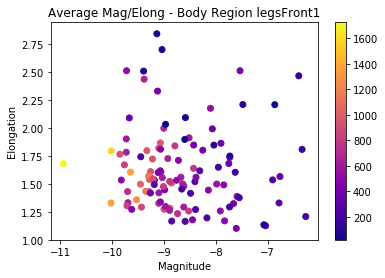

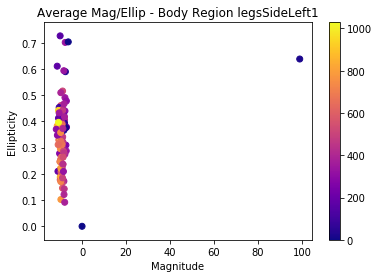

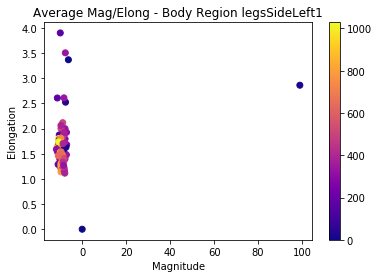

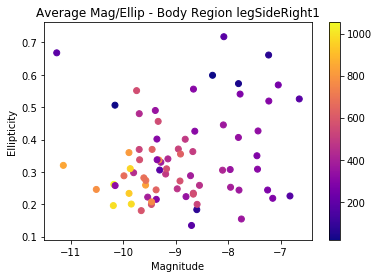

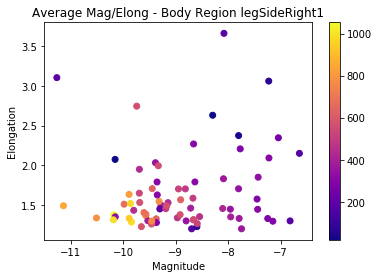

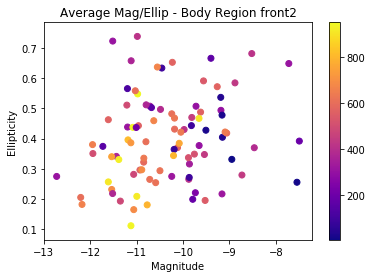

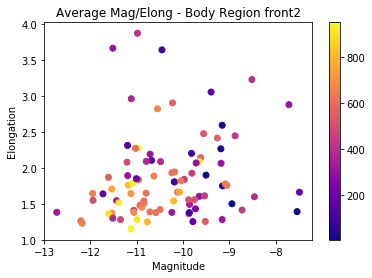

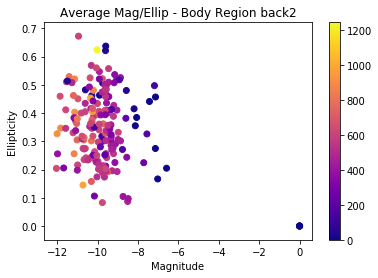

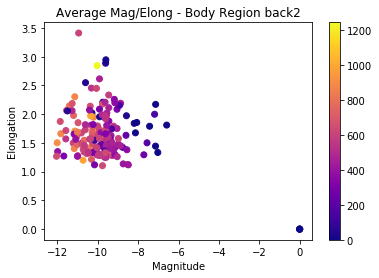

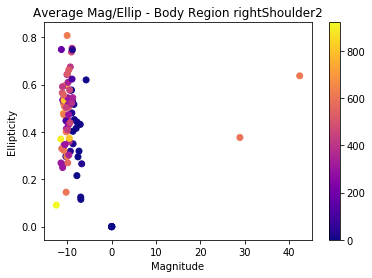

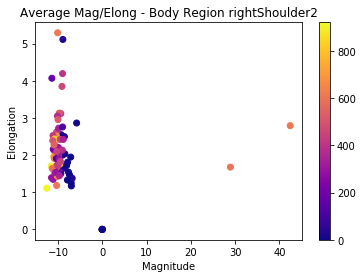

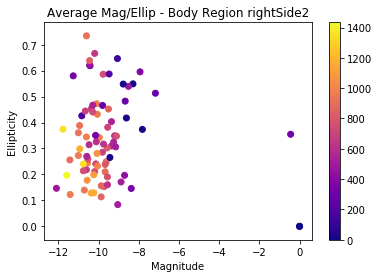

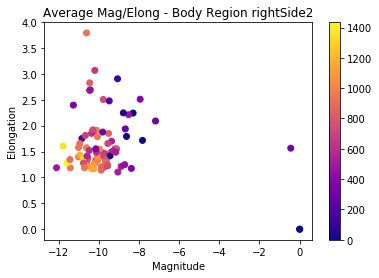

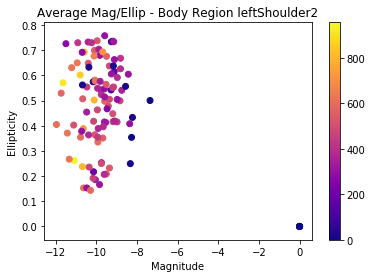

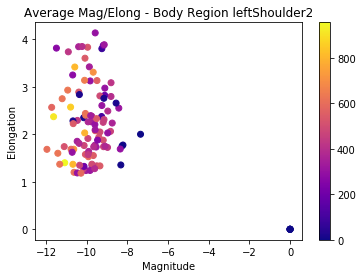

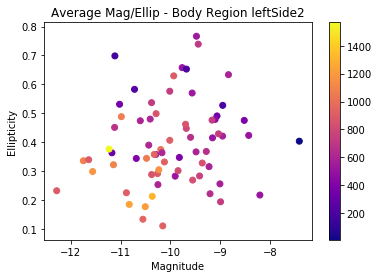

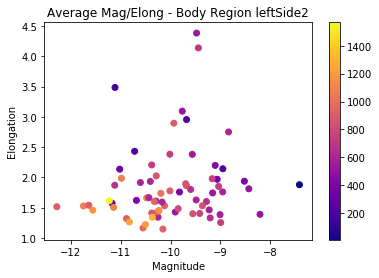

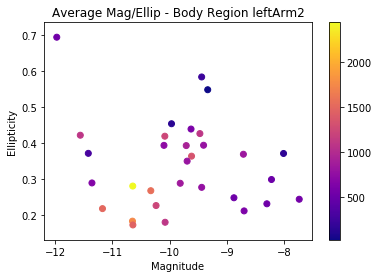

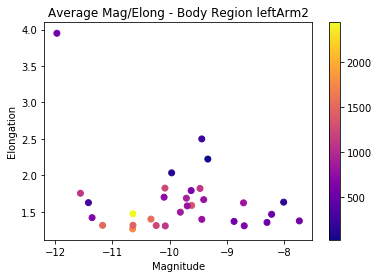

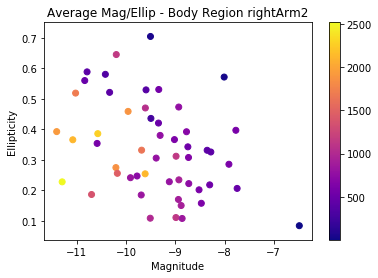

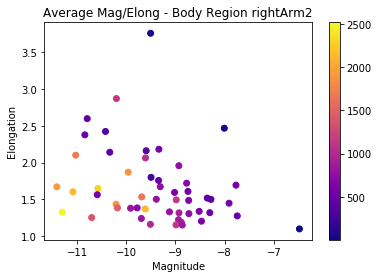

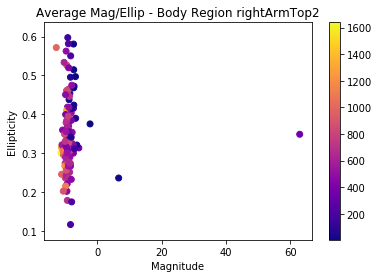

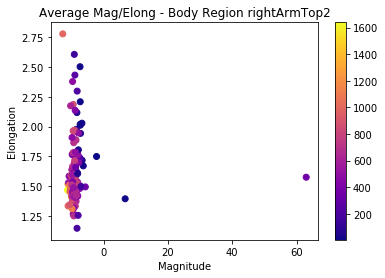

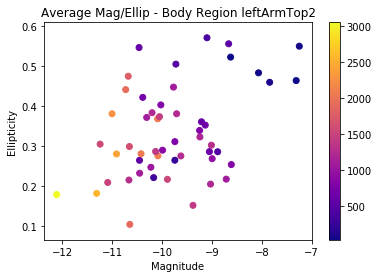

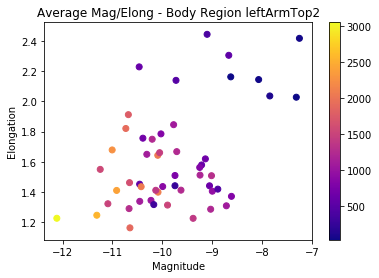

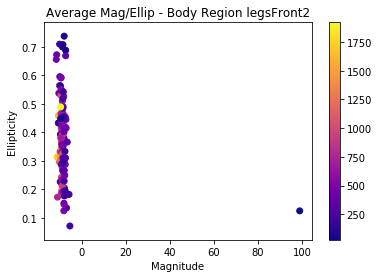

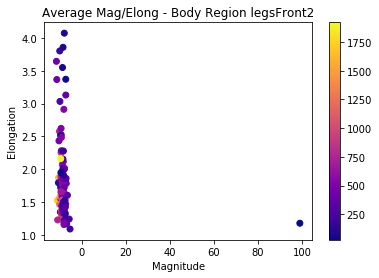

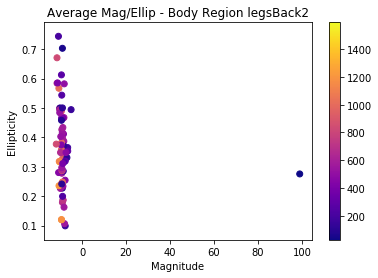

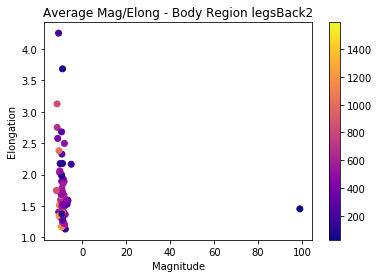

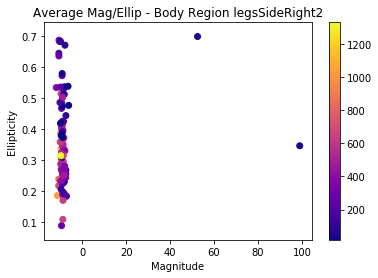

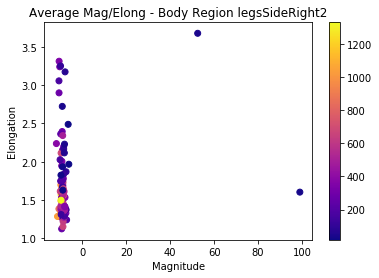

In [116]:
outputDirectory = '/home/mj1e16/moleGazer/Photos/F/fitsImages/simMolePos/'
inputDirectory = '/home/mj1e16/moleGazer/Photos/F/fitsImages/'
graphDirectory = '/home/mj1e16/moleGazer/Photos/F/fitsImages/graphSTASH/'

bigdetect = [[] for x in range(len(imageNumbers))]
bigMag = [[] for x in range(len(imageNumbers))]
bigelong = [[] for x in range(len(imageNumbers))]
bigellip = [[] for x in range(len(imageNumbers))]

for imNum in range(len(imageNumbers)):
    inputTableName = inputDirectory+str(imageNumbers[imNum])+'.reg'
    inputDataFrame = molePositions2Tab(inputTableName)
    
    detections = [0 for x in range(len(inputDataFrame))]
    magnitude = [0. for x in range(len(inputDataFrame))]
    ellipticity = [0. for x in range(len(inputDataFrame))]
    elongation = [0. for x in range(len(inputDataFrame))]
    
    for x in range(len(valList[0])):
        for y in range(len(valList[1])):
            for z in range(len(valList[2])):
                outputTableName = outputDirectory+str(imageNumbers[imNum])+'InvertedAverageCropped16{}_{}_{}.cat'.format(str(valList[0][x]),str(valList[1][y]),str(valList[2][z]))
                outputDataFrame = ascii.read(outputTableName)
                matchedDataFrame = assessQuality(outputDataFrame,sqlcode,inputDataFrame)
                detectionPerIm = matchedDataFrame['index'].tolist()
                magPerIm = matchedDataFrame['MAG_BEST'].tolist()
                ellipPerIm = matchedDataFrame['ELLIPTICITY'].tolist()
                elongPerIm = matchedDataFrame['ELONGATION'].tolist()
                
                bigdetect[imNum].append(detectionPerIm)
                bigMag[imNum].append(magPerIm)
                bigellip[imNum].append(ellipPerIm)
                bigelong[imNum].append(elongPerIm)
                
                for i,detect in enumerate(detectionPerIm):
                    #print(len(detections),len(magnitude),len(elongation),len(ellipticity))
                    
                    detections[detect] += 1
                    magnitude[detect] += magPerIm[i]
                    ellipticity[detect] +=  ellipPerIm[i]
                    elongation[detect] += elongPerIm[i]

    magAverage = [x/y if y!=0 else 0 for x,y in zip(magnitude,detections)]
    ellipAverage = [x/y if y!=0 else 0 for x,y in zip(ellipticity,detections)]
    elongAverage = [x/y if y!=0 else 0 for x,y in zip(elongation,detections)]
    
    plt.scatter(magAverage,ellipAverage,c=detections,cmap='plasma')
    plt.xlabel('Magnitude')
    plt.ylabel('Ellipticity')
    plt.colorbar()
    plt.title('Average Mag/Ellip - Body Region {}'.format(labels[imNum]))
    plt.savefig(graphDirectory+'AvMagEllip_{}_{}.png'.format(imageNumbers[imNum],labels[imNum]))
    plt.show()
    
    plt.scatter(magAverage,elongAverage,c=detections,cmap='plasma')
    plt.xlabel('Magnitude')
    plt.ylabel('Elongation')
    plt.colorbar()
    plt.title('Average Mag/Elong - Body Region {}'.format(labels[imNum]))
    plt.savefig(graphDirectory+'AvMagElong_{}_{}.png'.format(imageNumbers[imNum],labels[imNum]))
    plt.show()
    
    # match tables and try to keep the removed rows as zeroed rows
    # average all tables and find % time each mole was recovered
    
    # make one mega graph containing all points?

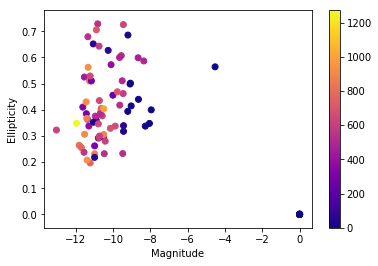

In [110]:
#cm = plt.cm.plasma
#fig, ax = plt.subplots()
plt.scatter(magAverage,ellipAverage,c=detections,cmap='plasma')
plt.xlabel('Magnitude')
plt.ylabel('Ellipticity')
plt.colorbar()
plt.show()

In [101]:
cmaplist

[(0.050382999999999997, 0.029803, 0.52797499999999997, 1.0),
 (0.063535999999999995, 0.028426, 0.53312400000000004, 1.0),
 (0.075353000000000003, 0.027206000000000001, 0.53800700000000001, 1.0),
 (0.086221999999999993, 0.026124999999999999, 0.54265799999999997, 1.0),
 (0.096379000000000006, 0.025165, 0.54710300000000001, 1.0),
 (0.10598, 0.024309000000000001, 0.55136799999999997, 1.0),
 (0.115124, 0.023556000000000001, 0.55546799999999996, 1.0),
 (0.123903, 0.022877999999999999, 0.559423, 1.0),
 (0.132381, 0.022258, 0.56325000000000003, 1.0),
 (0.14060300000000001, 0.021687000000000001, 0.56695899999999999, 1.0),
 (0.14860699999999999, 0.021153999999999999, 0.57056200000000001, 1.0),
 (0.156421, 0.020650999999999999, 0.57406500000000005, 1.0),
 (0.16406999999999999, 0.020171000000000001, 0.57747800000000005, 1.0),
 (0.171574, 0.019706000000000001, 0.58080600000000004, 1.0),
 (0.17895, 0.019251999999999998, 0.58405399999999996, 1.0),
 (0.18621299999999999, 0.018803, 0.58722799999999997,

In [78]:
outputTableName = outputDirectory+str(imageNumbers[0])+'InvertedAverageCropped16{}_{}_{}.cat'.format(str(valList[0][0]),str(valList[1][0]),str(valList[2][0]))
print(outputTableName)

/home/mj1e16/moleGazer/Photos/F/fitsImages/simMolePos/29005InvertedAverageCropped161.0_1.0_default.conv.cat


In [29]:
outputTable = '/home/mj1e16/moleGazer/Photos/F/fitsImages/simMolePos/79953InvertedAverageCropped166.44444444444_94.7894736842_tophat_5.0_5x5.conv.cat'
inputTable = '/home/mj1e16/moleGazer/Photos/F/fitsImages/79953.reg'

In [35]:
inputDataFrame = molePositions2Tab(inputTable)
outputDataFrame = ascii.read(outputTable)

In [71]:
inputDataFrame

,index,xLower,xUpper,xcoord,yLower,yUpper,ycoord
0,0,434.32017,444.32017,439.32017,3750.21710,3760.21710,3755.2171
1,1,1932.52150,1942.52150,1937.5215,3183.09900,3193.09900,3188.099
2,2,1947.95710,1957.95710,1952.9571,3164.37010,3174.37010,3169.3701
3,3,1853.51260,1863.51260,1858.5126,3257.42570,3267.42570,3262.4257
4,4,1370.63840,1380.63840,1375.6384,3329.86590,3339.86590,3334.8659
5,5,1571.63840,1581.63840,1576.6384,3216.86590,3226.86590,3221.8659
6,6,1270.63840,1280.63840,1275.6384,3238.86590,3248.86590,3243.8659
7,7,1441.63840,1451.63840,1446.6384,3218.86590,3228.86590,3223.8659
8,8,1136.63840,1146.63840,1141.6384,3219.86590,3229.86590,3224.8659
9,9,1164.63840,1174.63840,1169.6384,3138.86590,3148.86590,3143.8659


In [ ]:
with open('dumpFile.txt','w') as f:
    f.write('bigdetect = {}'.format(bigdetect)+'\nbigMag = {}'.format(bigMag)+'\nbigelong = {}'.format(bigelong)+'\nbigellip = {}'.format(bigellip)+'\nbigdetect = {}'.format(bigdetect)
bigMag = [[] for x in range(len(imageNumbers))]
bigelong = [[] for x in range(len(imageNumbers))]
bigellip = [[] for x in range(len(imageNumbers))])

In [38]:
matchedDataFrame = assessQuality(outputDataFrame,sqlcode,inputDataFrame)+


In [72]:
matchedDataFrame

,NUMBER,MAG_BEST,FLUX_MAX,X_IMAGE,Y_IMAGE,ELONGATION,ELLIPTICITY,index,xLower,xUpper,xcoord,yLower,yUpper,ycoord
0,26,-9.6190,95.54995,2335.9199,755.5700,1.160,0.138,67,2331.53180,2341.53180,2336.5318,750.45732,760.45732,755.45732
1,27,-10.5976,55.13518,2122.5598,835.1723,1.425,0.298,68,2120.34900,2130.34900,2125.349,832.35950,842.35950,837.3595
2,35,-11.2895,80.36137,590.6879,1439.4707,2.774,0.640,73,586.57163,596.57163,591.57163,1439.23370,1449.23370,1444.2337
3,45,-10.7002,81.98748,645.6608,1716.1104,1.507,0.337,75,641.31467,651.31467,646.31467,1711.27370,1721.27370,1716.2737
4,47,-10.5681,89.45854,2112.5591,1869.0991,1.195,0.163,54,2106.44130,2116.44130,2111.4413,1862.81960,1872.81960,1867.8196
5,48,-9.7688,69.70076,613.1940,1710.6876,1.396,0.284,76,608.31467,618.31467,613.31467,1704.27370,1714.27370,1709.2737
6,49,-9.2943,78.12744,2182.5657,1711.0192,1.333,0.250,58,2175.52760,2185.52760,2180.5276,1704.34410,1714.34410,1709.3441
7,52,-9.7299,70.95652,2198.1201,1811.5732,1.210,0.173,57,2193.02760,2203.02760,2198.0276,1804.67740,1814.67740,1809.6774
8,56,-9.4129,59.12543,582.5828,1908.7599,1.615,0.381,78,577.41334,587.41334,582.41334,1902.92310,1912.92310,1907.9231
9,60,-10.4372,64.82336,564.4615,2003.6487,1.441,0.306,82,558.81227,568.81227,563.81227,1999.42730,2009.42730,2004.4273


In [47]:
matchedNumbers = matchedDataFrame['NUMBER'].tolist()
matchedNumbers = [x-1 for x in matchedNumbers]

In [48]:
df = outputDataFrame.to_pandas()
dfSlim = df.drop(matchedNumbers)

In [57]:
matched = {}
falsePositive = {}

matched['magnitude'] = matchedDataFrame['MAG_BEST'].tolist()
matched['flux'] = matchedDataFrame['FLUX_MAX'].tolist()
matched['ellipticity'] = matchedDataFrame['ELLIPTICITY'].tolist()
matched['elongation'] = matchedDataFrame['ELONGATION'].tolist()

falsePositive['magnitude'] = dfSlim['MAG_BEST'].tolist()
falsePositive['flux'] = dfSlim['FLUX_MAX'].tolist()
falsePositive['ellipticity'] = dfSlim['ELLIPTICITY'].tolist()
falsePositive['elongation'] = dfSlim['ELONGATION'].tolist()

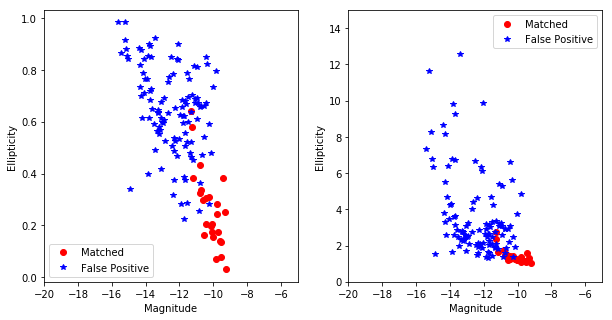

In [68]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(matched['magnitude'],matched['ellipticity'],'ro',label='Matched')
ax[0].plot(falsePositive['magnitude'],falsePositive['ellipticity'],'b*',label='False Positive')
ax[0].set_xlabel('Magnitude')
ax[0].set_ylabel('Ellipticity')
ax[0].legend()
ax[0].set_xlim([-20,-5])


ax[1].plot(matched['magnitude'],matched['elongation'],'ro',label='Matched')
ax[1].plot(falsePositive['magnitude'],falsePositive['elongation'],'b*',label='False Positive')
ax[1].set_xlabel('Magnitude')
ax[1].set_ylabel('Ellipticity')
ax[1].legend()
ax[1].set_xlim([-20,-5])
ax[1].set_ylim([0,15])
plt.show()

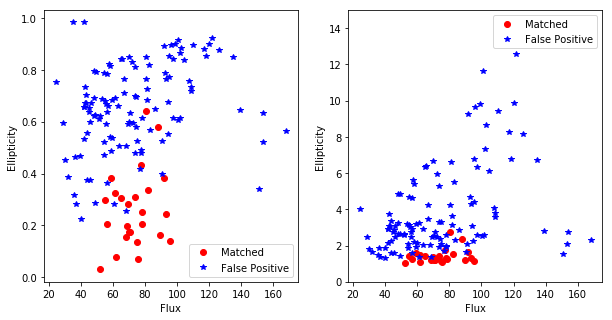

In [70]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(matched['flux'],matched['ellipticity'],'ro',label='Matched')
ax[0].plot(falsePositive['flux'],falsePositive['ellipticity'],'b*',label='False Positive')
ax[0].set_xlabel('Flux')
ax[0].set_ylabel('Ellipticity')
ax[0].legend()
# ax[0].set_xlim([-20,-5])


ax[1].plot(matched['flux'],matched['elongation'],'ro',label='Matched')
ax[1].plot(falsePositive['flux'],falsePositive['elongation'],'b*',label='False Positive')
ax[1].set_xlabel('Flux')
ax[1].set_ylabel('Ellipticity')
ax[1].legend()
# ax[1].set_xlim([-20,-5])
ax[1].set_ylim([0,15])
plt.show()